Replan Central:

We are currently plotting 3 proton channels:
  - P1: 0.8-4 MeV
  - P2: 4-9 MeV
  - P5: 40-90 MeV
  
GOES HRC proxy is currently computed as

HRC_PROXY = 6000 x P4 + 270000 x P5 + 100000 x P6

where P4, P5 and P6 are corresponding proton channels from

https://services.swpc.noaa.gov/text/goes-energetic-proton-flux-primary.txt

Label: P1 = Protons from 0.7 -   4 MeV units #/cm2-s-sr-MeV<br>
Label: P2 = Protons from   4 -   9 MeV units #/cm2-s-sr-MeV<br>
Label: P3 = Protons from   9 -  15 MeV units #/cm2-s-sr-MeV<br>
Label: P4 = Protons from  15 -  40 MeV units #/cm2-s-sr-MeV<br>
Label: P5 = Protons from  38 -  82 MeV units #/cm2-s-sr-MeV<br>
Label: P6 = Protons from  84 - 200 MeV units #/cm2-s-sr-MeV<br>
Label: P7 = Protons from 110 - 900 MeV units #/cm2-s-sr-MeV<br>
Label: P8 = Protons from 350 - 420 MeV units #/cm2-s-sr-MeV<br>
Label: P9 = Protons from 420 - 510 MeV units #/cm2-s-sr-MeV<br>
Label: P10= Protons from 510 - 700 MeV units #/cm2-s-sr-MeV<br>
Label: P11= Protons from      >700 MeV units #/cm2-s-sr-MeV<br>
Source: GOES-14

Archival GOES data since 2015 can be found here:
ftp://ftp.swpc.noaa.gov/pub/lists/pchan/

GOES-16 has 14 proton chanels, see below.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from Ska.Matplotlib import plot_cxctime
from Chandra.Time import DateTime
from Ska.tdb import msids
from Ska.engarchive import fetch as fetch

In [2]:
from astropy.table import Table
from astropy.io import ascii
import json

In [3]:
names = ['YR', 'MO', 'DA', 'HHMM', 'Day1', 'Day2', 'P1', 'P2', 'P3',
         'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11']

## Change in the value of GOES HRC proxy

In [4]:
def calc_hrc_proxy(p4, p5, p6):
    return 6000 * p4 + 270000 * p5 + 100000 * p6

def calc_g16_hrc_proxy(p4, p5, p6):
    return 6000000 * p4_flux + 2700000000 * p5_flux + 100000000 * p6_flux

def get_protons(fname):
    protons = Table.read(fname, format='ascii', names=names)
    hrc_proxy = calc_hrc_proxy(protons['P4'], protons['P5'], protons['P6'])
    protons['hrc_proxy'] = hrc_proxy
    return protons

def plot_hrc_proxy(fname, protons, label=''):
    plt.plot(protons['hrc_proxy'] / 256, label=label)
    plt.ylabel('GOES HRC proxy / 256')
    plt.ylim(1, 30)
    
def compare_protons(fnames, protons):

    colors = []
    for i in range(len(protons)):
        colors.append(f'C{i}')
    
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    for f, p, c in zip(fnames, protons, colors):
        plt.plot(p['P4'], color=c, alpha=0.7, label=f[:8])
    plt.legend()
    plt.title('P4')
    plt.grid()

    plt.subplot(1, 3, 2)
    for f, p, c in zip(fnames, protons, colors):
        plt.plot(p['P5'], color=c, alpha=0.7, label=f[:8])
    plt.legend()
    plt.title('P5')
    plt.grid()

    plt.subplot(1, 3, 3)
    for f, p, c in zip(fnames, protons, colors):
        plt.plot(p['P6'], color=c, alpha=0.7, label=f[:8])
    plt.legend()
    plt.title('P6')
    plt.grid()

In [5]:
f0 = '20150530_Gp_pchan_5m.txt'
p0 = get_protons(f0)

f1 = '20170101_Gp_pchan_5m.txt'
p1 = get_protons(f1)

f2 = '20190701_Gp_pchan_5m.txt'
p2 = get_protons(f2)

f3 = '20190707_Gp_pchan_5m.txt'
p3 = get_protons(f3)

f4 = '20190708_Gp_pchan_5m.txt'
p4 = get_protons(f4)

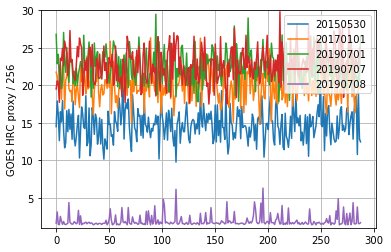

In [6]:
plot_hrc_proxy(f0, p0, label=f0[:8])
plot_hrc_proxy(f1, p1, label=f1[:8])
plot_hrc_proxy(f2, p2, label=f2[:8])
plot_hrc_proxy(f3, p3, label=f3[:8])
plot_hrc_proxy(f4, p4, label=f4[:8])
plt.legend(loc=1)
plt.grid()

__Figure:__ The drop in GOES HRC proxy happened on 2019-07-08. On that day the source changed from GOES-15 to GOES-14.

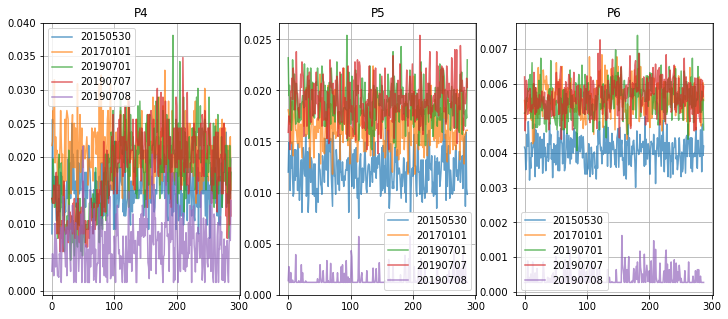

In [7]:
compare_protons([f0, f1, f2, f3, f4], [p0, p1, p2, p3, p4])

__Figure:__ The drop in GOES HRC proxy is due to much lower values of P5 and P6 starting with 2019-07-08. On that date the source changed from GOES-15 to GOES-14.

## HRC shield rate from telemetry, before and after the drop in HRC proxy value

In [8]:
def plot_hrc_shield(times, vals):
    secs = times
    hrc_shield = vals / 256.
    bad = hrc_shield < 0.1
    hrc_shield = hrc_shield[~bad]
    secs = secs[~bad]

    plt.figure(1, figsize=(6, 4))
    ticks, fig, ax = plot_cxctime(secs, hrc_shield)
    xlims = ax.get_xlim()
    dx = (xlims[1] - xlims[0]) / 20.
    ax.set_xlim(xlims[0] - dx, xlims[1] + dx)
    ax.set_ylim(min(hrc_shield.min() * 0.5, 10.0),
                max(hrc_shield.max() * 2, 300.))
    plt.plot([xlims[0] - dx, xlims[1] + dx], [235, 235], '--r')
    ax.set_yscale('log')
    plt.grid()
    plt.title('GOES proxy for HRC shield rate / 256')
    plt.ylabel('Cts / sample')
    plt.tight_layout()

In [9]:
dat = fetch.Msid('2shldart', '2019:180:00:00:00', '2019:200:00:00:00')

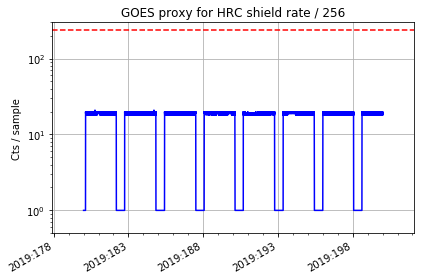

In [10]:
plot_hrc_shield(dat.times, dat.vals)

__Figure:__ Before the drop in HRC proxy value.

In [11]:
dat = fetch.Msid('2shldart', '2020:001:00:00:00', '2020:003:00:00:00')

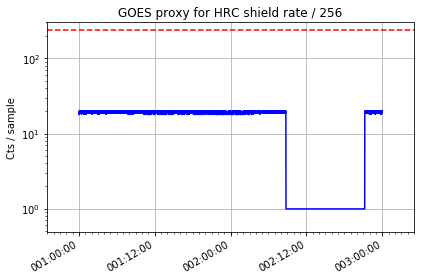

In [12]:
plot_hrc_shield(dat.times, dat.vals)

__Figure:__ After the drop in HRC proxy value. HRC shield rate is still ~20 but GOES HRC shield proxy is currently one order of magnitude lower than that.

## GOES-15 new json files, day 2020-01-21

In [13]:
with open('20200121-g15_protons_5m.json') as json_file:
    data = json.load(json_file)

In [14]:
t = Table(data)

In [15]:
t.colnames

['p10_flux',
 'p11_flux',
 'p1_flux',
 'p2_flux',
 'p3_flux',
 'p4_flux',
 'p5_flux',
 'p6_flux',
 'p7_flux',
 'p8_flux',
 'p9_flux',
 'time_tag']

In [16]:
hrc_proxy_g15 = 6000 * t['p4_flux'] + 270000 * t['p5_flux'] + 100000 * t['p6_flux']

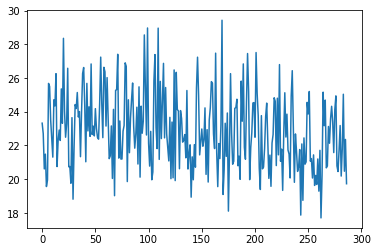

In [17]:
plt.plot(hrc_proxy_g15 / 256);

## GOES-14 new json files, day 2020-01-21

In [18]:
with open('20200121-g14_protons_5m.json') as json_file:
    data = json.load(json_file)

In [19]:
t = Table(data)

In [20]:
hrc_proxy_g14 = 6000 * t['p4_flux'] + 270000 * t['p5_flux'] + 100000 * t['p6_flux']

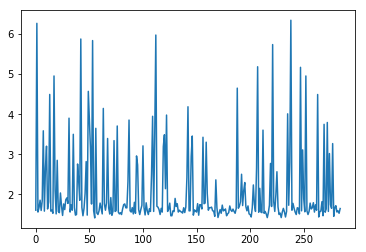

In [21]:
plt.plot(hrc_proxy_g14 / 256);

## GOES-16 new json files, day 2020-01-21

In [22]:
with open('20200121-g16-1-day.json') as json_file:
    data = json.load(json_file)

In [23]:
t = Table(data)

In [24]:
t.colnames

['energy', 'flux', 'satellite', 'time_tag']

In [25]:
elos = []
ehis = []
for row in t['energy']:
    tmp = row.split(' ')
    items = tmp[0].split('-')
    elos.append(float(items[0]) / 1000) # convert from keV to MeV
    ehis.append(float(items[1]) / 1000)

In [26]:
t['e_lo'] = elos
t['e_hi'] = ehis

In [27]:
t.sort('time_tag')

In [28]:
t[:14]

energy,flux,satellite,time_tag,e_lo,e_hi
str17,float64,int64,str20,float64,float64
1020-1860 keV,0.000216602304135,16,2020-01-20T23:50:00Z,1.02,1.86
99900-118000 keV,7.87921862866e-07,16,2020-01-20T23:50:00Z,99.9,118.0
83700-98500 keV,1.42257704283e-06,16,2020-01-20T23:50:00Z,83.7,98.5
5840-11000 keV,1.17532026707e-05,16,2020-01-20T23:50:00Z,5.84,11.0
3400-6480 keV,0.0,16,2020-01-20T23:50:00Z,3.4,6.48
276000-404000 keV,1.64054156926e-07,16,2020-01-20T23:50:00Z,276.0,404.0
40300-73400 keV,2.30821615332e-06,16,2020-01-20T23:50:00Z,40.3,73.4
2310-3340 keV,0.0,16,2020-01-20T23:50:00Z,2.31,3.34
1900-2300 keV,0.0,16,2020-01-20T23:50:00Z,1.9,2.3


__Table:__ GOES-16 has 14 energy channels (protons). Chanels corresponding to those used so far to compute the GOES HRc proxy are: P4 ~ 11640-23270 keV + 25900-38100 keV, P5 ~ 40300-73400 keV, P6 ~ 83700-98500 keV + 99900-118000 keV + 115000-143000 keV + 160000-242000 keV.

In [29]:
p4_flux = 0
p5_flux = 0
p6_flux = 0
rows = []
row = []
time_tag = t['time_tag'][0]

for entry in t:
    if entry['time_tag'] != time_tag:
        rows.append(['p4', p4_flux, 16, time_tag, 11.6, 23.27])
        rows.append(['p5', p5_flux, 16, time_tag, 40.3, 73.4])
        rows.append(['p6', p6_flux, 16, time_tag, 83.7, 242])
        new_hrc_proxy = calc_g16_hrc_proxy(p4_flux, p5_flux, p6_flux)
        rows.append(['hrc_proxy', new_hrc_proxy, 16, time_tag, 11.6, 242])
        p4_flux = 0
        p5_flux = 0
        p6_flux = 0
        time_tag = entry['time_tag']
        
    if entry['energy'] in ('11640-23270 keV', '25900-38100 keV'):
        p4_flux += entry['flux']
    if entry['energy'] == '40300-73400 keV':
        p5_flux = entry['flux']
    if entry['energy'] in ('83700-98500 keV', '99900-118000 keV',
                           '115000-143000 keV', '160000-242000 keV'):
        p6_flux += entry['flux']

In [30]:
for row in rows:
    t.add_row(row)

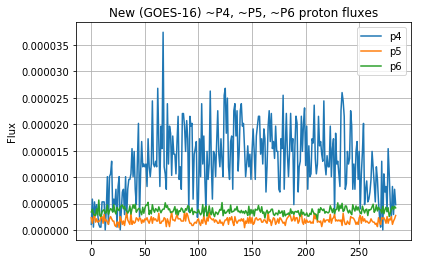

In [31]:
ok = t['energy'] == 'p4'
plt.plot(t['flux'][ok], label='p4')

ok = t['energy'] == 'p5'
plt.plot(t['flux'][ok], label='p5')

ok = t['energy'] == 'p6'
plt.plot(t['flux'][ok], label='p6')

plt.legend()
plt.ylabel('Flux')
plt.title('New (GOES-16) ~P4, ~P5, ~P6 proton fluxes')
plt.grid()

__Figure:__ These fluxes are orders of mag lower than corresponding fluxes in G14/G15 chanels. HRC proxy needs to be corrected for this.

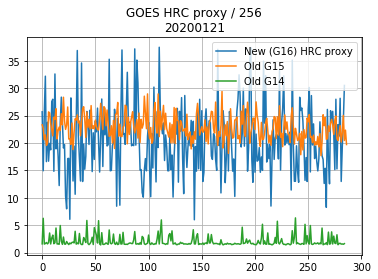

In [32]:
ok = t['energy'] == 'hrc_proxy'
plt.plot(t['flux'][ok] / 256, label='New (G16) HRC proxy')
plt.plot(hrc_proxy_g15 / 256, label='Old G15')
plt.plot(hrc_proxy_g14 / 256, label='Old G14')

plt.legend()
plt.title('GOES HRC proxy / 256\n20200121')
plt.grid()